In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Creating Synthetic Workforce Dataset

In [2]:
n = 200
df = pd.DataFrame({
    "employee_id": range(1, n+1),
    "team": np.random.choice(["Ops", "Product", "Engineering", "Support"], n),
    "manager": np.random.choice(["Chen", "Singh", "Rodriguez", "Patel"], n),
    "hours_worked": np.random.uniform(30, 55, n),
    "tasks_completed": np.random.poisson(20, n),
    "overtime_hours": np.random.uniform(0, 10, n),
    "satisfaction_score": np.random.uniform(2.5, 5.0, n)
})

# Productivity metric
df["productivity"] = df["tasks_completed"] / df["hours_worked"]

df.head()

,employee_id,team,manager,hours_worked,tasks_completed,overtime_hours,satisfaction_score,productivity
0,1,Engineering,Rodriguez,46.050791,20,2.686774,2.717467,0.434303
1,2,Support,Patel,32.103499,18,5.416342,3.521133,0.560687
2,3,Ops,Rodriguez,34.040718,27,6.334782,3.431721,0.793168
3,4,Engineering,Chen,52.463855,30,2.578877,3.149384,0.571822
4,5,Engineering,Patel,45.160726,22,1.393561,4.308550,0.487149


# Team Productivity Summary

In [3]:
team_perf = df.groupby("team")["productivity"].mean().reset_index()
team_perf

,team,productivity
0,Engineering,0.471813
1,Ops,0.512224
2,Product,0.430253
3,Support,0.465074


# Hours worked vs Tasks Completed

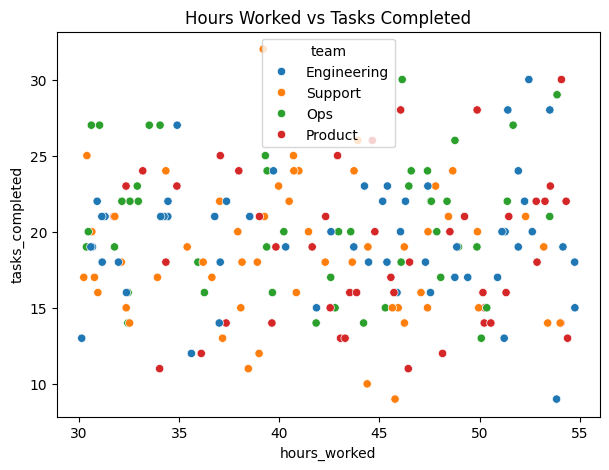

In [4]:

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="hours_worked", y="tasks_completed", hue="team")
plt.title("Hours Worked vs Tasks Completed")
plt.show()

# Productivity by team

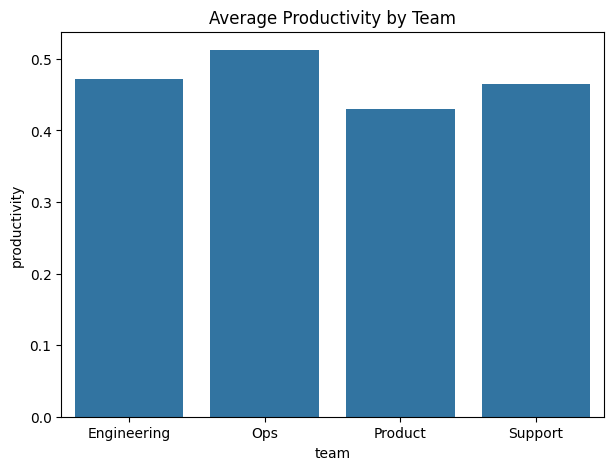

In [5]:
plt.figure(figsize=(7,5))
sns.barplot(data=team_perf, x="team", y="productivity")
plt.title("Average Productivity by Team")
plt.show()

# Overtime vs Satisfaction Heatmap

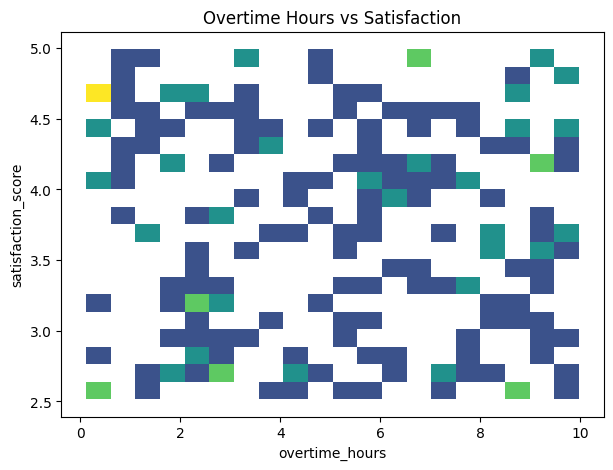

In [6]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x="overtime_hours", y="satisfaction_score", bins=20, cmap="viridis")
plt.title("Overtime Hours vs Satisfaction")
plt.show()

# Manager Productivity Dsitribution

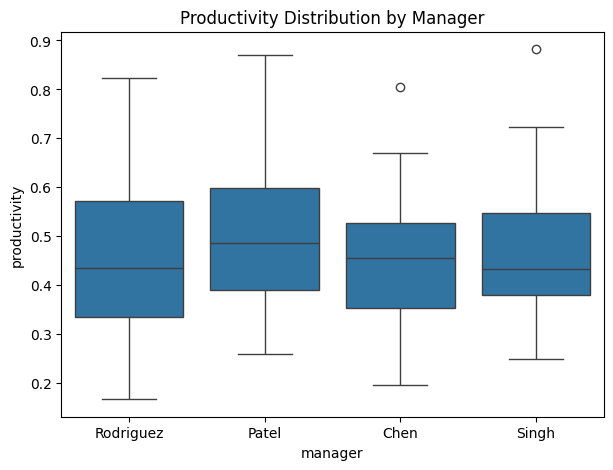

In [7]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="manager", y="productivity")
plt.title("Productivity Distribution by Manager")
plt.show()

# Burnout Risk Detection

In [9]:

df["burnout_risk"] = np.where(
    (df["overtime_hours"] > 7) & (df["satisfaction_score"] < 3.2),
    "High Risk",
    "Normal"
)

burnout_cases = df[df["burnout_risk"] == "High Risk"]
burnout_cases.head()

,employee_id,team,manager,hours_worked,tasks_completed,overtime_hours,satisfaction_score,productivity,burnout_risk
6,7,Ops,Patel,32.536789,22,9.844022,2.702616,0.676158,High Risk
33,34,Product,Patel,42.312942,21,7.380336,2.573118,0.496302,High Risk
58,59,Engineering,Patel,44.251529,23,7.281888,2.756274,0.519756,High Risk
64,65,Engineering,Rodriguez,51.934327,19,7.994159,2.668377,0.365847,High Risk
76,77,Support,Chen,49.957379,15,8.729458,2.555309,0.300256,High Risk
